<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/8_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L08 Segmentation I


In [1]:
!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O ca
!wget https://drive.google.com/uc?id=1ZAdq_5_Tck7h2ruGExn-8FVB1y3Ox0DE -O 2lines.png
!wget https://drive.google.com/uc?id=1H3sk8nqoePFTDQd0e1CqBQ3_GvfYFXpM -O bacteria.png
!wget https://drive.google.com/uc?id=1Y9yB011V9H4TwYn2kp0CUAbXsIb8rMbS -O circle.png
!wget https://drive.google.com/uc?id=1DesK4q3LLaRLDi5viU-3c0C-vy8fjh1A -O circuit1.PNG
!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O cameraman.tif
!wget https://drive.google.com/uc?id=1QQFMlY8Ds4D7-AUh_g-WqWhZhiAQFwMc -O clock2.jpg
!wget https://drive.google.com/uc?id=1KSPV-8X8HtNHfFF4RlT_t_hn5Trfl6K4 -O coins.jpg
!wget https://drive.google.com/uc?id=1jFTYRxlNDfxA0o5NIkQr97dt7b-2DmRa -O findLine2.png
!wget https://drive.google.com/uc?id=12szRAjUEPWbLf_vfpItbcdBf5VAZOfz1 -O findLines.png
!wget https://drive.google.com/uc?id=16YXK8gHT5Sj0Tc0ggnzdbIl_sh49PHDd -O home_cropped.jpg

--2024-10-16 14:53:56--  https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG
Resolving drive.google.com (drive.google.com)... 173.194.212.101, 173.194.212.100, 173.194.212.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG [following]
--2024-10-16 14:53:56--  https://drive.usercontent.google.com/download?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38783 (38K) [image/png]
Saving to: ‘ca’

ca                  100%[===================>]  37.87K  --.-KB/s    in 0s      

2024-10-16 14:53:59 (104 MB/s) - ‘ca’ saved [38783/38783]

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy import signal
from scipy.ndimage import gaussian_filter

## Edge detection
* Sobel : https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
* Canny : https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

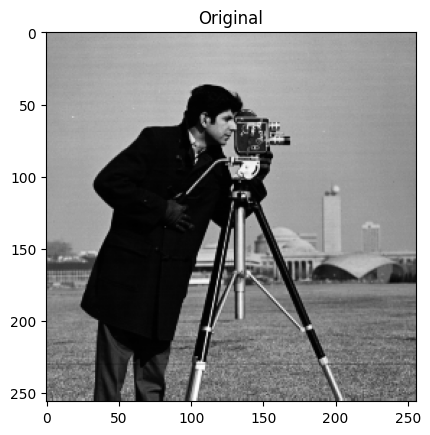

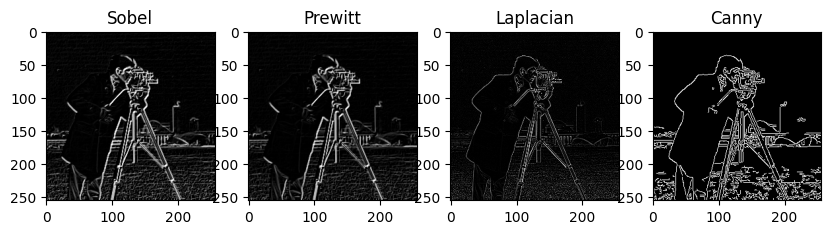

In [7]:
img = cv2.imread('cameraman.tif',0)
plt.imshow(img,cmap="gray");plt.title("Original")
plt.show()

#sobel
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
img_sobel = cv2.magnitude(img_sobelx.astype(float), img_sobely.astype(float))

#prewitt
kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
img_prewitt = cv2.magnitude(img_prewittx.astype(float), img_prewitty.astype(float))

#Laplacian
Laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img_Laplacian = cv2.filter2D(img, -1, Laplacian)


#canny
img_canny = cv2.Canny(img,100,200)


plt.figure(figsize=(10, 10))
plt.subplot(141), plt.imshow(img_sobel, cmap='gray'), plt.title('Sobel')
plt.subplot(142), plt.imshow(img_prewitt, cmap='gray'), plt.title('Prewitt')
plt.subplot(143), plt.imshow(img_Laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(144), plt.imshow(img_canny, cmap='gray'), plt.title('Canny')
plt.show()



## Hough Line transform
* https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html

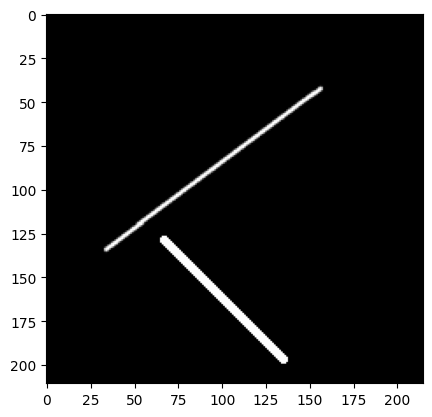

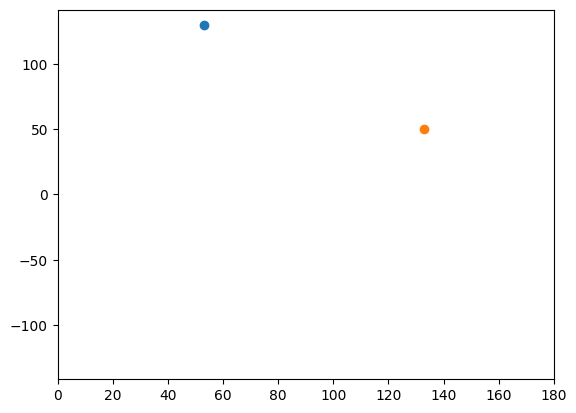

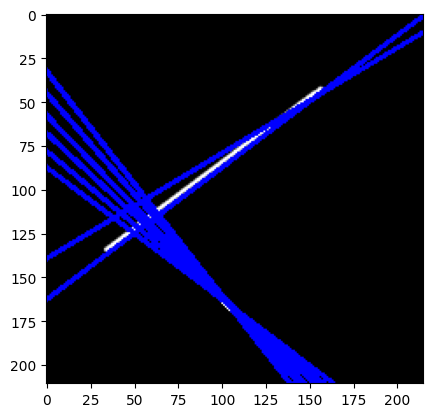

In [8]:
# HoughLines transforms
img = cv2.imread('2lines.png')
plt.imshow(img)
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,10,np.pi/180,200)

# # Convert radian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi

# plt.imshow(img)
# plt.show()
# # use scatter plot
for i in range(0,2):#len(linesdegree)):
	plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

# # set x,y limits
plt.xlim(0, 180)
plt.ylim(-100*np.sqrt(2), 100*np.sqrt(2))
plt.show()

# Draw the detected line on the image
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(img)
plt.show()

### Exercise #1 Use Hough Line transform to find the clock hands

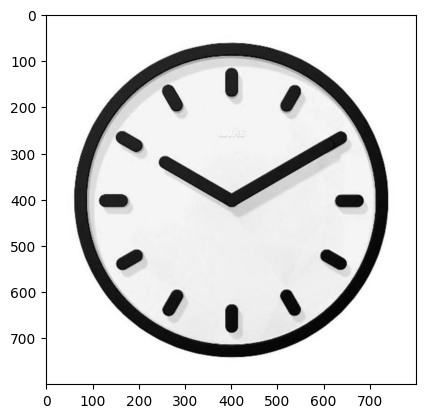

[[[555.          1.0471976]]

 [[155.          2.0943952]]

 [[535.          1.0471976]]]


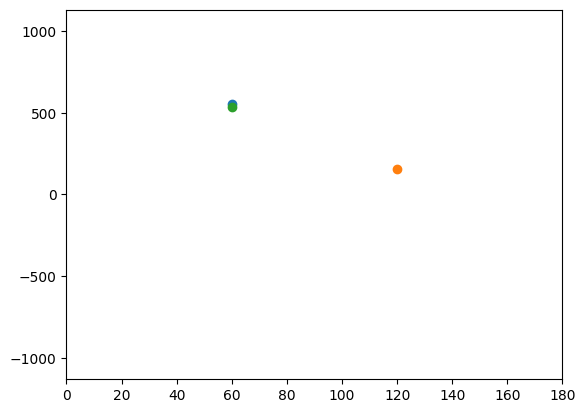

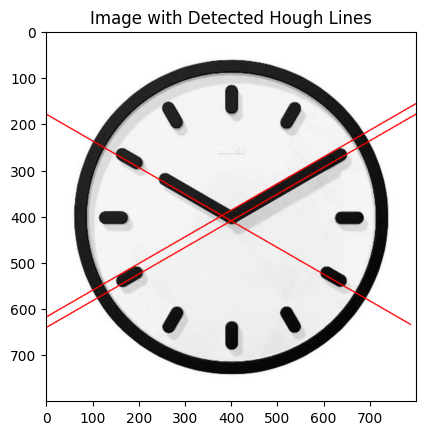

In [10]:
img = cv2.imread('clock2.jpg')
plt.imshow(img)
plt.show()



gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
m,n = gray.shape
edges = cv2.Canny(gray,50,150,apertureSize = 3)

# TO DO #1: Try to customize Hough Line paraters
lines = cv2.HoughLines(edges,10,np.pi/180,500)
print(lines)
# # Convert radian to degree
linesdegree = lines.copy()
linesdegree[:,0:1,1:2] =linesdegree[:,0:1,1:2]*180/np.pi

# # use scatter plot
for i in range(0,len(linesdegree)):
	plt.scatter(linesdegree[i,0:1,1:2],linesdegree[i,0:1,0:1])

# # set x,y limits
plt.xlim(0, 180)
plt.ylim(-m*np.sqrt(2), m*np.sqrt(2))
plt.show()

# TO DO #2: Draw the detected lines on the image
# Loop through each line and draw it on the image
if lines is not None:
    for i in range(0, len(lines)):
        rho, theta = lines[i][0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw the lines on the original image
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image with lines drawn
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with Detected Hough Lines")
plt.show()








### Exercise #2 Use Hough Circle to find the circle of the clock
* https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

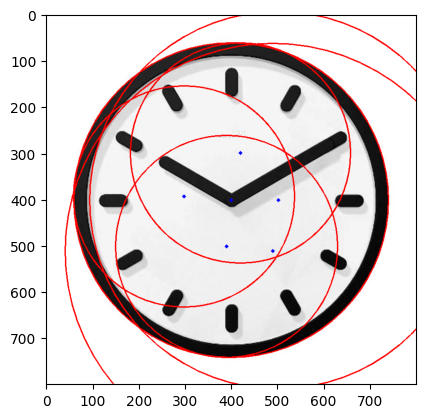

In [11]:
img = cv2.imread('clock2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3)
# TO DO: Use Hough Circle to find the circle of the clock & adjust the parameters
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,100,
                            param1=50,param2=30,minRadius=200)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(255,0,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img)
plt.show()

## Threshold

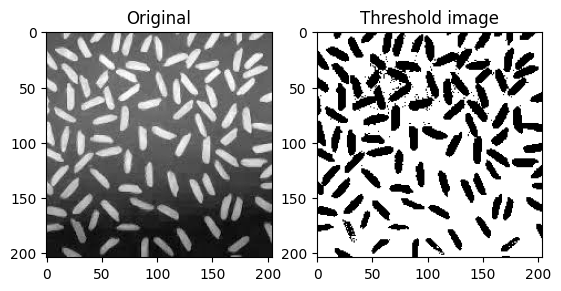

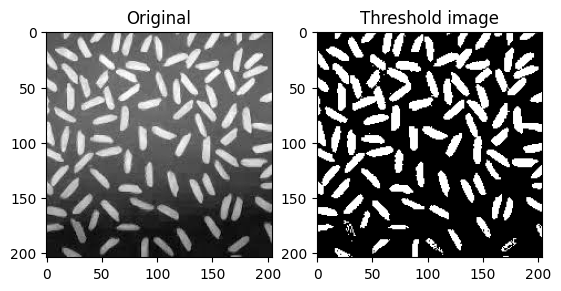

In [17]:
img = cv2.imread("bacteria.png",0)
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)

plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2),plt.imshow(thresh1,'gray')
plt.title("Threshold image")
plt.show()


# TO DO: Choose the threshold that best segments the bacteria from your own perspective
ret,thresh1 = cv2.threshold(img,130,255,cv2.THRESH_BINARY)

plt.subplot(1,2,1),plt.imshow(img,'gray')
plt.title("Original")
plt.subplot(1,2,2),plt.imshow(thresh1,'gray')
plt.title("Threshold image")
plt.show()







* Adaptive Threshold

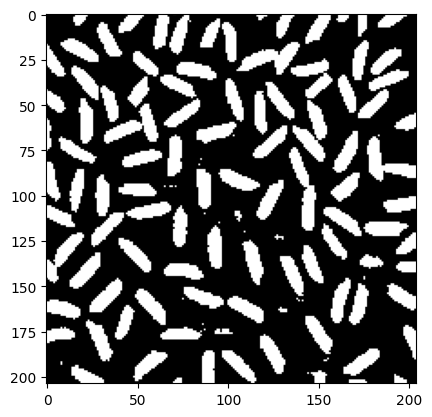

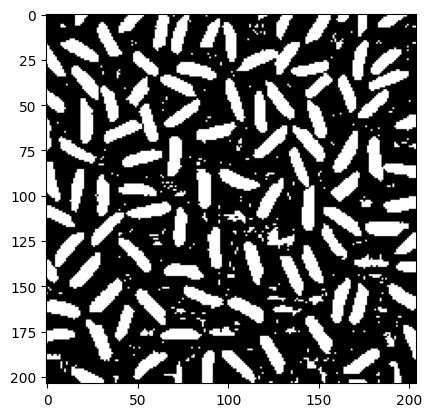

In [18]:
img = cv2.imread("bacteria.png",0)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,21,0)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,21,0)


plt.imshow(th2,cmap='gray')
plt.show()

plt.imshow(th3,cmap='gray')
plt.show()

## Optimal Threshold
* See what is the output threshold selected by Otsu's thresholding
* https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

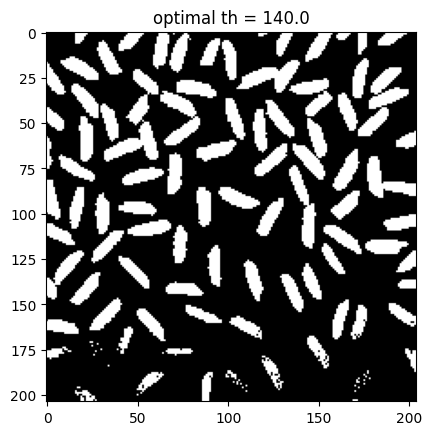

In [19]:
img = cv2.imread("bacteria.png",0)

ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY)

plt.imshow(thresh1,cmap='gray')
plt.title("optimal th = " + str(ret))
plt.show()




## Region Growing
* https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

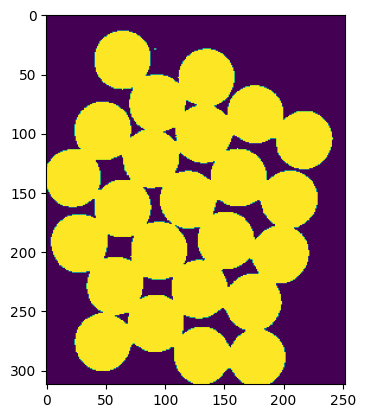

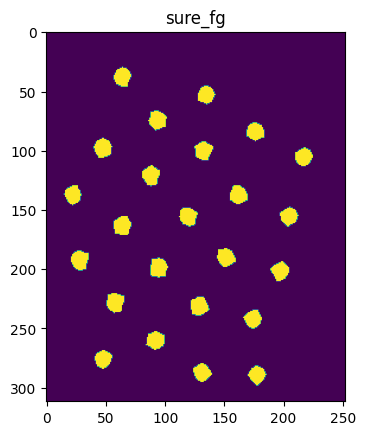

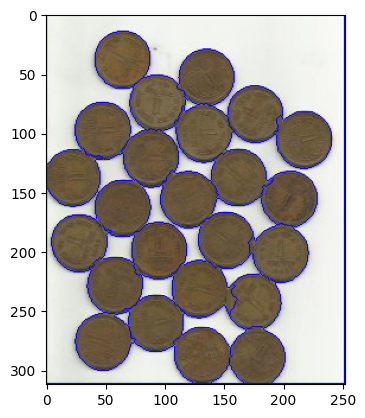

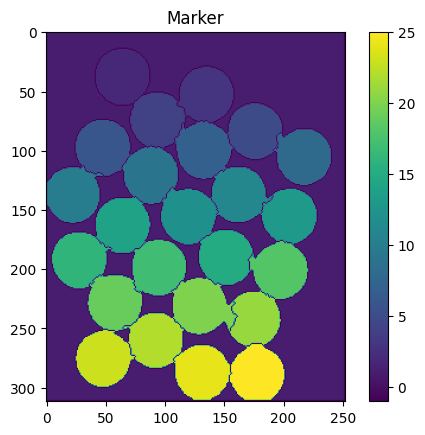

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh);plt.show()


# Finding sure foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,cv2.THRESH_BINARY)
plt.imshow(sure_fg);plt.title("sure_fg");plt.show()
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0] # BGR

plt.imshow(img[:,:,::-1]);plt.show()
plt.imshow(markers);plt.colorbar();plt.title("Marker");plt.show()